In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("../data_regression/data.csv")

In [3]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

# Visualization

In [4]:
def corelation_heat_map(df: pd.DataFrame) -> None:
    #for numeric values create heatmap
    numeric_cols = df.select_dtypes(exclude =["object", "category"]).columns
    corr = df[numeric_cols].corr(method = "pearson")
    corr = np.round(corr, 2)
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot= True)
    plt.title("Corelation Heatmap")
    plt.show()
def corelation_feature_with_target(df: pd.DataFrame, y: pd.Series) -> None:
    #for numeric values create bar plot
    numeric_cols = df.select_dtypes(exclude=['object', 'category']).columns
    corr = df[numeric_cols].corrwith(df['price']).abs()
    plt.figure(figsize=(10,8))
    corr.plot(kind = 'barh', color = 'orange')
    plt.title("Feature corelations with target")
    plt.xlabel("Absolute corelation")
    plt.ylabel("Feature")
    plt.grid(True, axis = 'x', alpha = 0.6)
    plt.show()
def target_distribution_y_vs_log_y(y: pd.Series, log_y: np.ndarray) -> None:
    #hist for price distribution
    plt.figure(figsize=(8,6))
    plt.hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Original SalePrice Distribution')
    plt.xlabel("Price")
    plt.ylabel("House count")
    plt.xlim(0,4000000)
    plt.grid(True, alpha = 0.3)
    plt.show()
    #hisr for log(x+1) price distribution
    plt.figure(figsize=(8,6))
    plt.hist(log_y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Log(x+1) SalePrice Distribution')
    plt.xlabel("log_price")
    plt.ylabel("count")
    plt.grid(True, alpha = 0.3)
    plt.show()
    #box plot without outlayers for y
    plt.figure(figsize=(8,6))
    sns.boxplot(y = y, showfliers = False)
    plt.title("Box plot SalePrice distribution")
    plt.show()

    #box plot for log(y+1)
    plt.figure(figsize=(8,6))
    sns.boxplot(log_y)
    plt.title("Box plot log(x+1) SalePrice distribution")
    plt.show()


    plt.figure(figsize=(8,6))
    sns.kdeplot(y, fill=True)
    plt.xlim(0,4000000)
    plt.title("kde plot SalePrice distribution")
    plt.show()

    plt.figure(figsize=(8,6))
    sns.kdeplot(log_y, fill=True)
    plt.title("kde plot log(x+1) SalePrice distribution")
    plt.show()

    
    

    


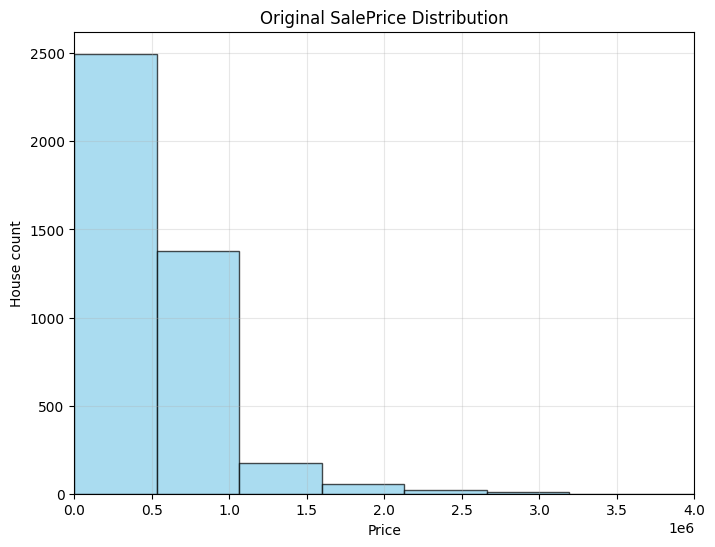

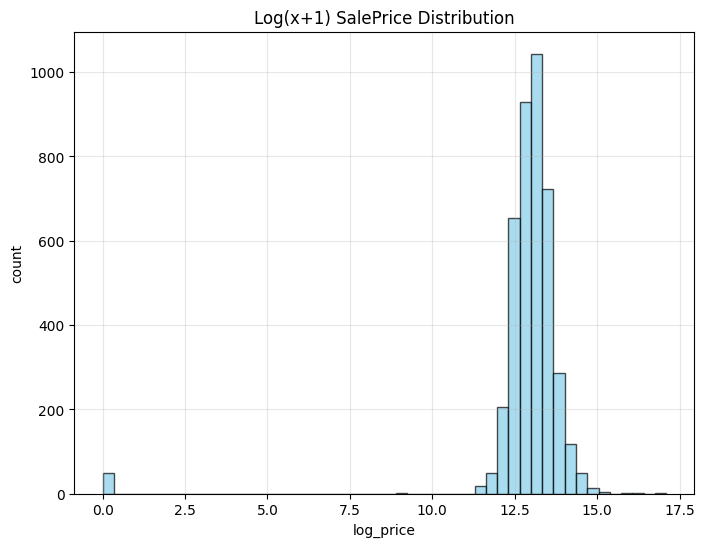

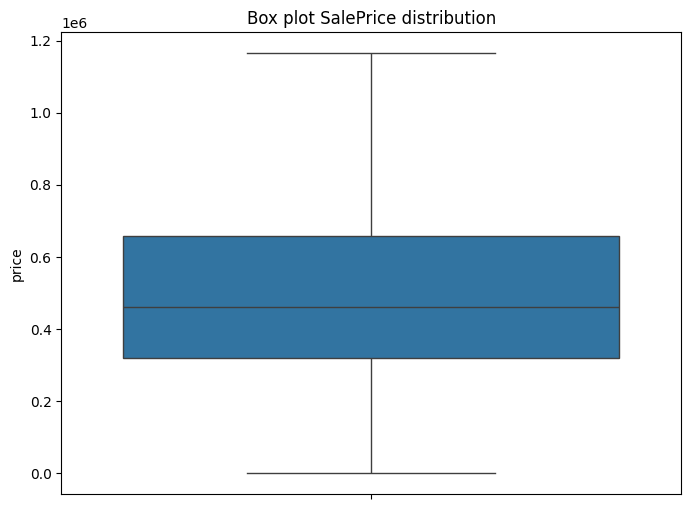

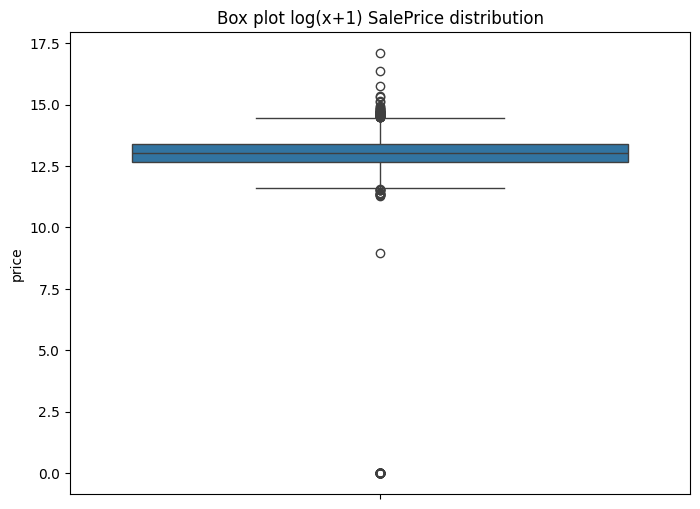

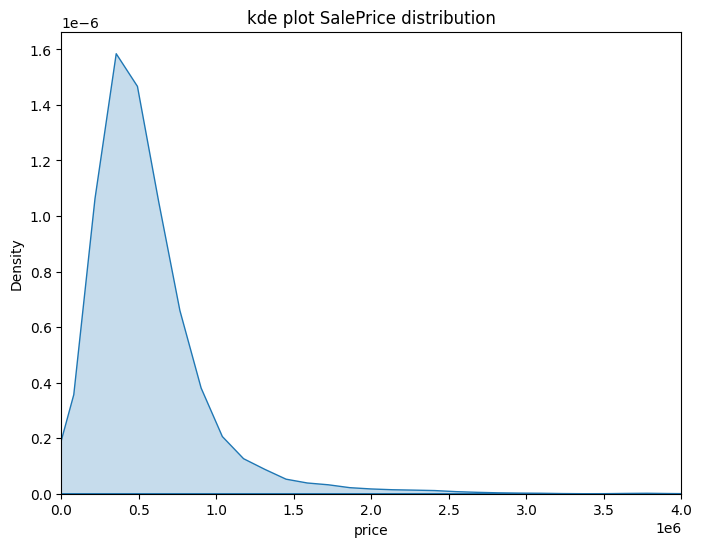

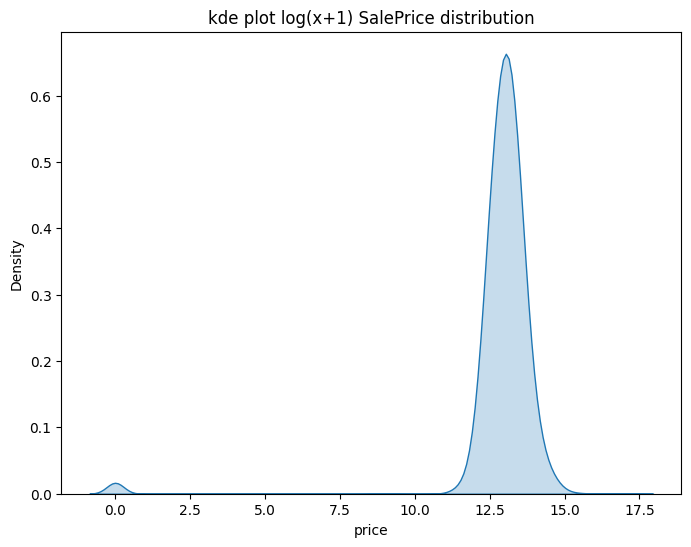

In [5]:
target_distribution_y_vs_log_y(df['price'], np.log1p(df['price']))

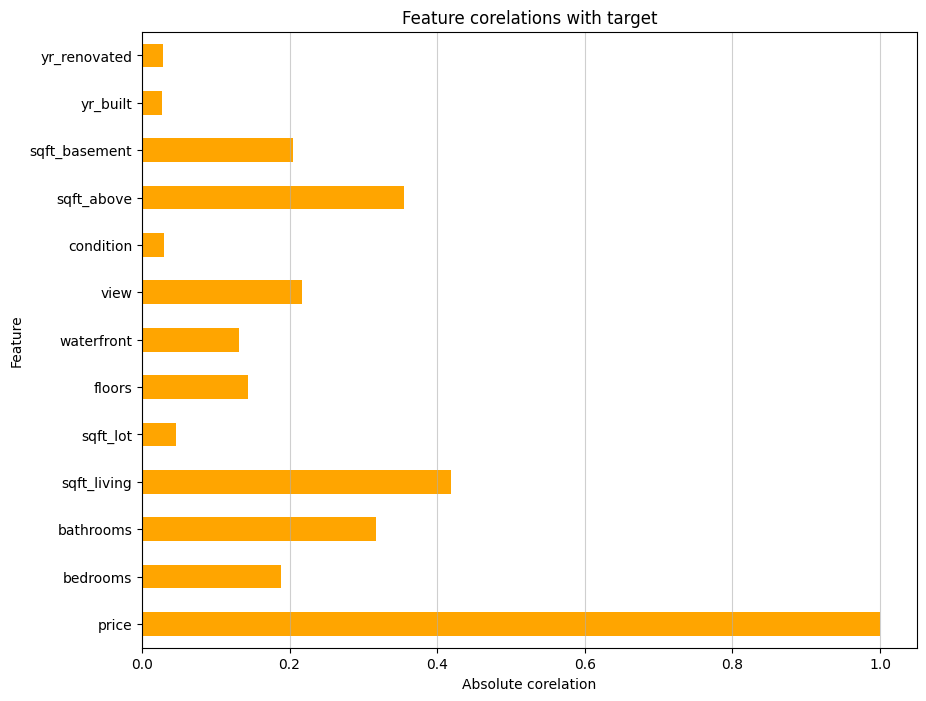

In [6]:
corelation_feature_with_target(df,df['price'])

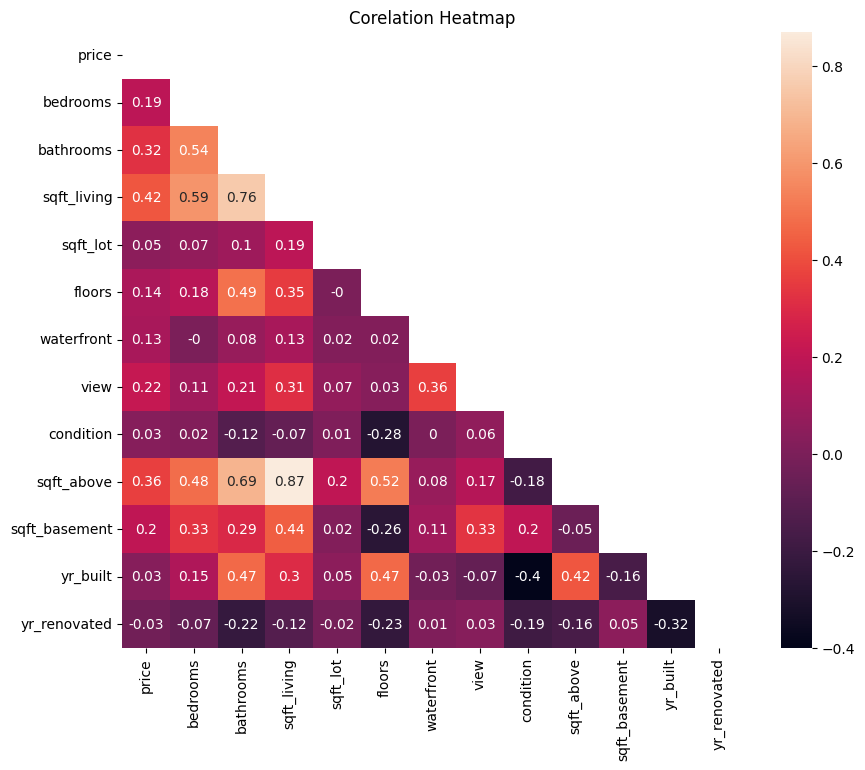

In [7]:
corelation_heat_map(df)

In [ ]:
df.isna().sum()

In [83]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


# Feature Enginering

In [34]:
def add_enigenered_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()


    #binary features
    df['has_basement'] = (
        (df.get("sqft_basement", 0).fillna(0) > 0).astype(int)
    )
    df['been_renovated'] = (
        (df.get("yr_renovated", 0).fillna(0) != 0).astype(int)
    )
    df['is_multistory'] = (
        (df.get("floors",0).fillna(0) > 1).astype(int)
    )
    #age features
    df['date'] = pd.to_datetime(df['date'])

    df['year_sold'] = df['date'].dt.year
    df['month_sold'] = df['date'].dt.month
    df['age'] = (
        df.get("year_sold",0).fillna(0) -
        df.get("yr_built",0).fillna(0)
    )
    df['years_since_renovated'] = np.where(
        (df['yr_renovated'] == 0) | (df['yr_renovated'] < df['yr_built']),
        0,
        df['year_sold'] - df['yr_built']

    )
    df['basement_ratio'] = (
    df.get("sqft_basement", 0).fillna(0) /
    df.get("sqft_living", 0).fillna(0)
    )
    df['lot_to_living_ratio']  = (
        df.get("sqft_lot", 0).fillna(0) /
        df.get("sqft_living", 0).fillna(0)
    )
    df['years_after_renovated'] = np.where(
        (df['yr_renovated'] == 0) | (df['yr_renovated'] < df['yr_built']),
        0,
        df['yr_renovated'] - df['yr_built']
    )

    return df
    
    
    

In [36]:
train['years_since_renovated'].unique()

array([  0,  93,  52, 104,  86,  24, 108,  63,  27,  60,  53,  73,  59,
        92,  46,  55,  95, 103,  37,  57,  56,  47,  72,  71,  44,  58,
        75,  67,  41, 105,  36,  50,  61,  89,  51,  64,  62,  16,  66,
        33,  90,  26,  74,  65,  91,  96,  42,  31,  35, 102, 111,  54,
        45,  88, 114,  32,  94,  69,  77,  38, 106, 100,  49,  68,  79,
       107, 101,  82,  97,  87,  84,  98,  80, 109,  76,  81,  48])

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4140 non-null   datetime64[ns]
 1   price                  4140 non-null   float64       
 2   bedrooms               4140 non-null   float64       
 3   bathrooms              4140 non-null   float64       
 4   sqft_living            4140 non-null   int64         
 5   sqft_lot               4140 non-null   int64         
 6   floors                 4140 non-null   float64       
 7   waterfront             4140 non-null   int64         
 8   view                   4140 non-null   int64         
 9   condition              4140 non-null   int64         
 10  sqft_above             4140 non-null   int64         
 11  sqft_basement          4140 non-null   int64         
 12  yr_built               4140 non-null   int64         
 13  yr_

In [35]:
train = add_enigenered_features(df)
# train[train['years_after_renovated'] == -100].iloc[0]
